# sales analysis

1. 매출이 가장 좋은 달은 언제이며 그 달에 얼마를 벌었나?
2. 가장 많은 제품을 판매 한 도시는?
3. 고객의 제품 구매 가능성을 극대화하기 위해 몇시에 광고를 해야할까?
4. 함께 판매되는 제품은 무엇일까?
5. 가장 많이 팔린 제품은 무엇입니까? 왜 그랬을까?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Park/_Python_data/salesanalysis/all_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### 1. 매출이 가장 좋은 달은 언제이며 그 달에 얼마를 벌었나?

> 결과 : 12월 / 4613443.34

- 매출이 좋은 달을 찾기 위해 '월' 변수를 추가한다.
- '월' 변수는 정수형으로 변환한다

In [3]:
df['OrderMonth'] = df['Order Date'].str[0:2].astype('int')
df

ValueError: cannot convert float NaN to integer

- 데이터를 살펴보니 545개의 결측값이 존재한다.
- 결측값은 dropna를 사용하여 제거한다.

In [4]:
display(df[df.isnull().any(axis=1)])
display(df.isnull().sum())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df = df.dropna(axis=0)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
df['OrderMonth'] = df['Order Date'].str[0:2].astype('int')

ValueError: invalid literal for int() with base 10: 'Or'

- 이번에는 데이터에 'Or'이 존재하여 정수형 변환이 불가능하다.
- 마찬가지로 이 데이터는 .str.contains 메서드를 사용하여 삭제한다.

In [7]:
drop_or = df[df.loc[:,'Order Date'].str.contains('Or')].index
df = df.drop(index = drop_or,axis=0)
df['OrderMonth'] = df['Order Date'].str[0:2].astype('int')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,OrderMonth
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


- 매출액을 얻기 위해 Quantity Ordered와	Price Each을 곱하여 매출액 변수 추가
- 위의 과정을 위해서 두 변수를 실수형으로 변환

In [8]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,OrderMonth,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [9]:
result_sales = df.groupby('OrderMonth').sum().sort_values('Sales',ascending=False).reset_index()
result_sales

,OrderMonth,Quantity Ordered,Price Each,Sales
0,12,28114,4588415.41,4613443.34
1,10,22703,3715554.83,3736726.88
2,4,20558,3367671.02,3390670.24
3,11,19798,3180600.68,3199603.20
4,5,18667,3135125.13,3152606.75
5,3,17005,2791207.83,2807100.38
6,7,16072,2632539.56,2647775.76
7,6,15253,2562025.61,2577802.26
8,8,13448,2230345.42,2244467.88
9,2,13449,2188884.72,2202022.42


<AxesSubplot:title={'center':'Sales'}, xlabel='OrderMonth', ylabel='Sales'>

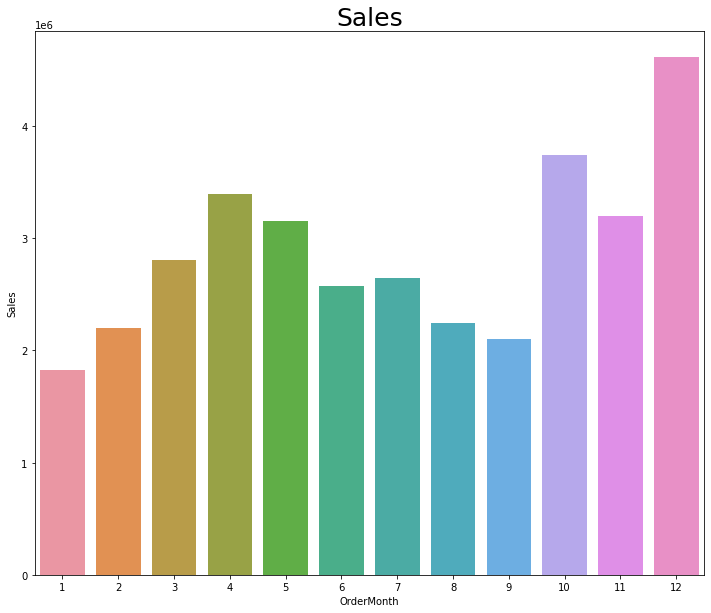

In [10]:
plt.figure(figsize=(12,10))
plt. title('Sales',fontsize=25)
sns.barplot(result_sales.OrderMonth, result_sales.Sales)

### 2. 가장 많은 제품을 판매 한 도시는?

> 결과 : San Francisco / 8262203.91

- split() 메서드를 사용하여 구매주소에서 도시 정보만 추출한다.

In [11]:
city = df['Purchase Address'].apply(lambda x : x.split(',')[1])
state = df['Purchase Address'].apply(lambda x : x.split(',')[2]).str[1:3]
df['City'] = city+ ' ' + state
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,OrderMonth,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [12]:
result_city = df.groupby('City').sum().sort_values('Sales',ascending=False).reset_index()
result_city

,City,Quantity Ordered,Price Each,OrderMonth,Sales
0,San Francisco CA,50239,8211461.74,315520,8262203.91
1,Los Angeles CA,33289,5421435.23,208325,5452570.80
2,New York City NY,27932,4635370.83,175741,4664317.43
3,Boston MA,22528,3637409.77,141112,3661642.01
4,Atlanta GA,16602,2779908.20,104794,2795498.58
5,Dallas TX,16730,2752627.82,104620,2767975.40
6,Seattle WA,16553,2733296.01,104941,2747755.48
7,Portland OR,11303,1860558.22,70621,1870732.34
8,Austin TX,11153,1809873.61,69829,1819581.75
9,Portland ME,2750,447189.25,17144,449758.27


<AxesSubplot:title={'center':'City'}, xlabel='City', ylabel='Sales'>

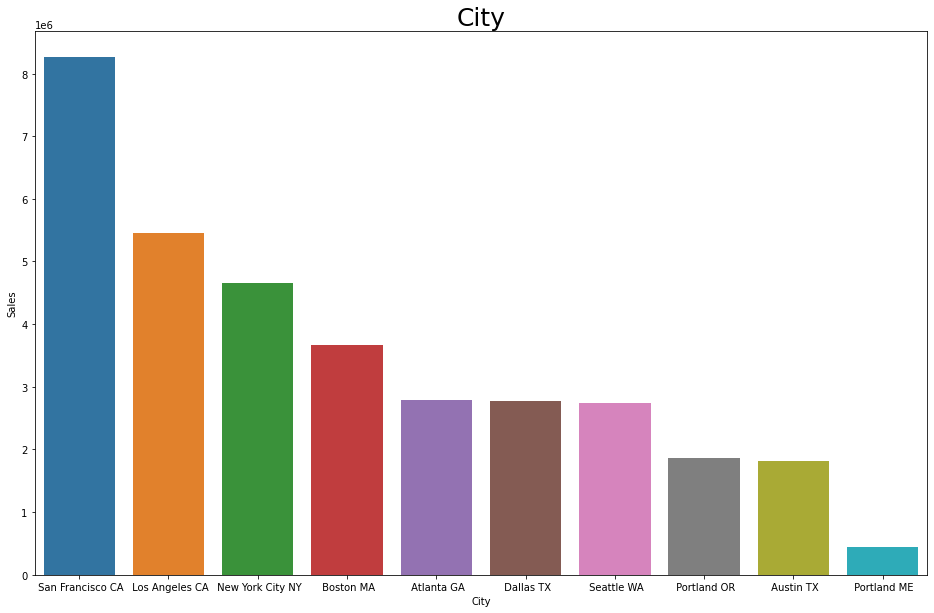

In [13]:
plt.figure(figsize=(16,10))
plt. title('City',fontsize=25)
sns.barplot(result_city.City, result_city.Sales)

### 3. 고객의 제품 구매 가능성을 극대화하기 위해 몇시에 광고를 해야할까?

> 11-13시와 18-20시가 가장 주문량이 많다

- 특히 12시와 19시에 주문량이 가장 많다. 따라서 0.5~2시간 전에 광고를 하는 것이 좋을 수 있다.

- 시간별 데이터를 집계하기 위해 Order Date 변수를 datetime 으로 변환
- 이후 hour 변수 생성

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,OrderMonth,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [15]:
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,OrderMonth,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17


In [16]:
result_hour = df.groupby('Hour')['Quantity Ordered'].count().reset_index()
result_hour

,Hour,Quantity Ordered
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


<AxesSubplot:title={'center':'Hour'}, xlabel='Hour', ylabel='Quantity Ordered'>

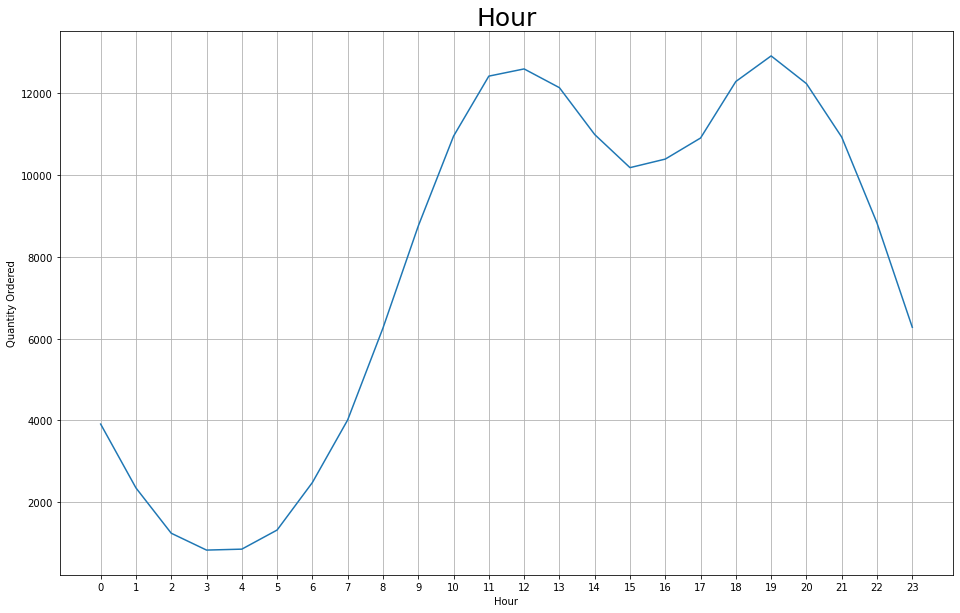

In [17]:
plt.figure(figsize=(16,10))
plt. title('Hour',fontsize=25)
plt.xticks(result_hour.Hour)
plt.grid()
sns.lineplot(result_hour.Hour, result_hour['Quantity Ordered'])

### 4. 함께 판매되는 제품은 무엇일까?

> iPhone과 Lightning Charging Cable제품이 1005건으로 집계

- 함께 판매되는 제품을 찾기 위해 Order ID 중복값을 찾은 후
- 중복에 해당하는 제품을 하나의 단일 행으로 결합

In [18]:
result_bun = df[df['Order ID'].duplicated(keep=False)]  # duplicated(keep=False) : 중복데이터 모두 제거(불리언으로 출력됨)
                                                         # 따라서 앞의 코드를 작성하면 중복데이터만을 추출할 수 있다.
result_bun

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,OrderMonth,Sales,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13


In [19]:
result_bun['Product_Bunddle'] = result_bun.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
result_bun

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,OrderMonth,Sales,City,Hour,Product_Bunddle
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13,"Google Phone,USB-C Charging Cable"


- 이제 다시 중복값을 제거

In [20]:
result_bun = result_bun[['Order ID','Product_Bunddle']].drop_duplicates()
result_bun 

,Order ID,Product_Bunddle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


- Counter() 모듈은 입력받은 자료로부터 키와 값 형태로 각 요소의 개수를 계산하여 출력(각 요소는 키, 요소의 개수는 값)
- combinations() 모듈은 배열에서 모든 조합을 찾아 출력한다

In [21]:
from itertools import combinations
from collections import Counter

In [22]:
# 아래 코딩의 결과는 각 행에서 Product_Bunddle 요소를 출력하여 count 변수에 추가함으로써
# 조합의 개수를 출력하는 함수이다.

count = Counter()

for row in result_bun['Product_Bunddle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))   # row_list 에서 2개를 뽑는 모든 조합
count

Counter({('Google Phone', 'Wired Headphones'): 414,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 27,
         ('AAA Batteries (4-pack)', 'Google Phone'): 11,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Apple Airpods Headphones', 'ThinkPad Laptop'): 9,
         ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 37,
         ('34in Ultrawide Monitor', 'Google Phone'): 2,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('AAA Batteries (4-pack)', '27in FHD Monitor'): 22,
         ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 45,
         ('iPhone', 'Wired Headphones'): 447,
         ('iPhone', '27in 4K Gaming Monitor'): 6,
         ('ThinkPad Laptop', 'AAA Batteries (4-pack)'): 16,
         ('iPhone', 'Apple Airpods Headph

In [23]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### 5. 가장 많이 팔린 제품은 무엇입니까? 왜 그랬을까?

In [24]:
result_product = df.groupby('Product').sum().reset_index()
result_product

,Product,Quantity Ordered,Price Each,OrderMonth,Sales,Hour
0,20in Monitor,4129,451068.99,29336,454148.71,58764
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
8,Flatscreen TV,4819,1440000.00,34224,1445700.00,68815
9,Google Phone,5532,3315000.00,38305,3319200.00,79479


<AxesSubplot:title={'center':'Product'}, xlabel='Product', ylabel='Quantity Ordered'>

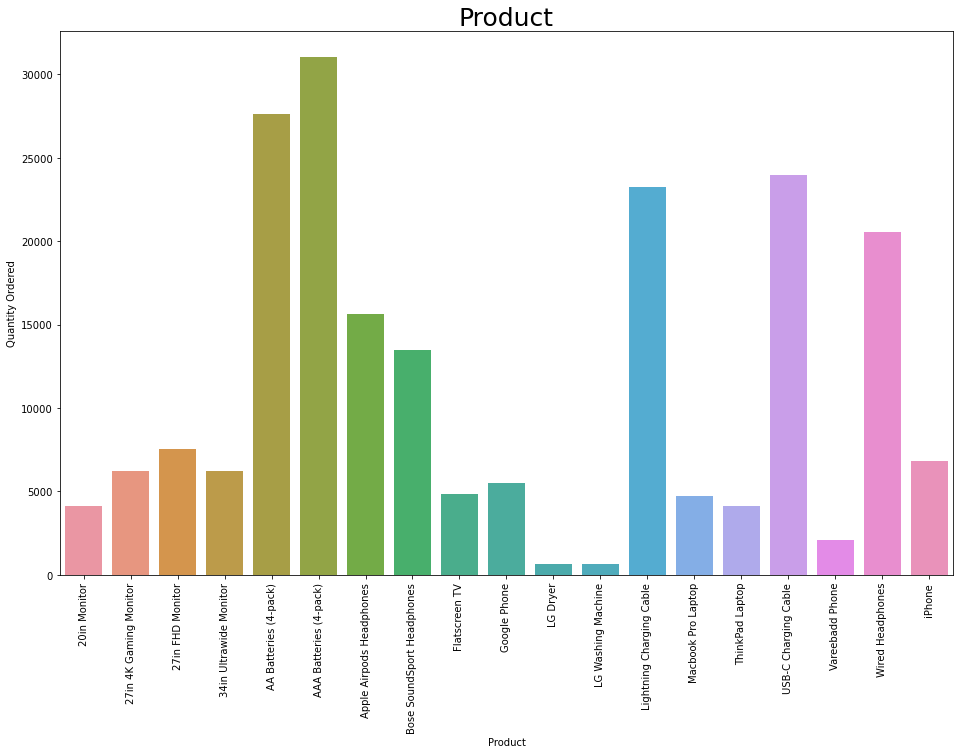

In [25]:
plt.figure(figsize=(16,10))
plt. title('Product',fontsize=25)
plt.xticks(rotation = 90)  # 변수 이름 로테이션
sns.barplot(result_product.Product, result_product['Quantity Ordered'])

- 가장 많이 팔린 제품은 aaa 배터리임을 알 수 있다.
- 그러나 매출에 기여하는 정도는 어떻게 될까?

In [26]:
prices = df.groupby('Product').sum()['Price Each'].reset_index()
prices

,Product,Price Each
0,20in Monitor,451068.99
1,27in 4K Gaming Monitor,2429637.70
2,27in FHD Monitor,1125974.93
3,34in Ultrawide Monitor,2348718.19
4,AA Batteries (4-pack),79015.68
5,AAA Batteries (4-pack),61716.59
6,Apple Airpods Headphones,2332350.00
7,Bose SoundSport Headphones,1332366.75
8,Flatscreen TV,1440000.00
9,Google Phone,3315000.00


<AxesSubplot:title={'center':'Product'}, xlabel='Product', ylabel='Price Each'>

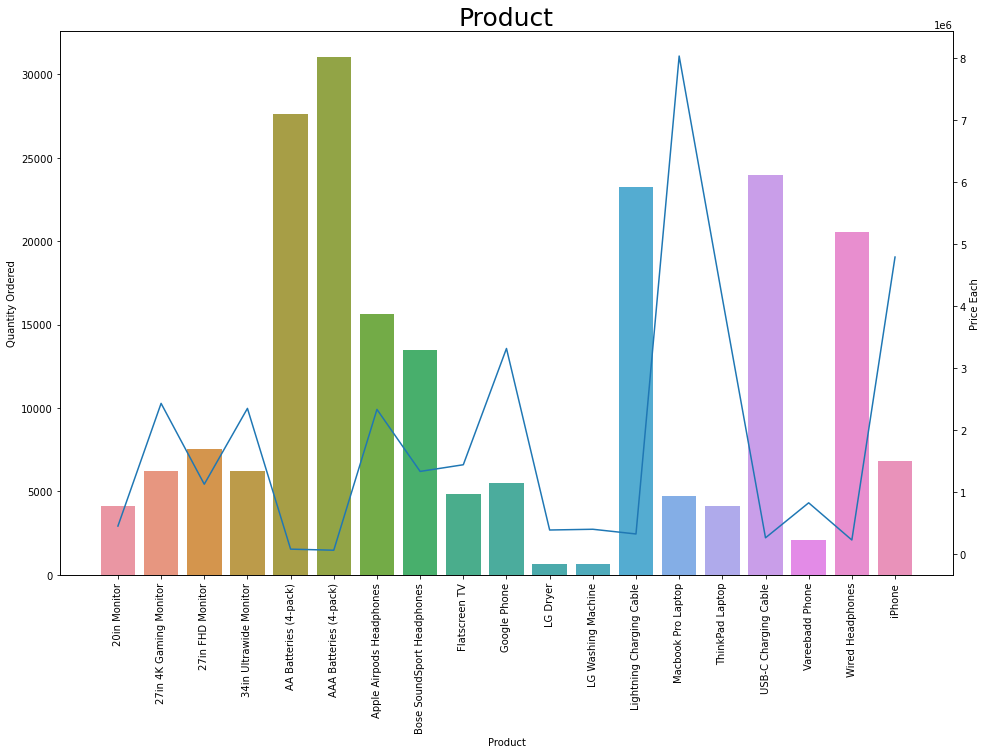

In [27]:
fig, ax1 = plt.subplots(1,figsize=(16,10))
ax2 = ax1.twinx()

plt.title('Product',fontsize=25)
ax1.set_xticklabels(result_product['Quantity Ordered'], rotation = 90)  # 변수 이름 로테이션
sns.barplot(result_product.Product, result_product['Quantity Ordered'],ax=ax1)
sns.lineplot(prices.Product, prices['Price Each'], ax= ax2)

- 결과를 보면 역시 배터리가 매출에 기여하는 바는 상당히 적다.
- 매출에 기여하는 바가 큰 제품은 맥북과 아이패드이며, 배터리는 다른 제품에 소모품으로 사용이 많이 되기 때문에 매출량이 큰 것으로 파악된다.